In [16]:
import pandas as pd
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input,BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array 



In [2]:
img_size=258
batch_size=64

traingen=ImageDataGenerator(rescale=1/255.,
                           brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)
#rescale ==> Rescales the pixel values with the 0-1 range
#Randomly rotates the image, max. 50 degree
#Randomly set the brightness of the image within the given range


testgen=ImageDataGenerator(rescale=1/255.)

valgen=ImageDataGenerator(rescale=1/255.,                    
                           brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)

In [3]:
traindata=traingen.flow_from_directory('G:/eye data/Splited_Dataset(0.8,0.1,0.1)/train',
                                   target_size=(img_size,img_size),
                                   batch_size = batch_size,
                                   shuffle=True,
                                   class_mode='binary',
                                   color_mode='grayscale')
testdata=testgen.flow_from_directory('G:/eye data/Splited_Dataset(0.8,0.1,0.1)/test',
                                    shuffle=False,
                                    batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode='binary',
                                    color_mode='grayscale')
valdata=valgen.flow_from_directory('G:/eye data/Splited_Dataset(0.8,0.1,0.1)/validation',
                                  shuffle=False,
                                    batch_size=batch_size,
                                   target_size=(img_size,img_size),
                                   class_mode='binary',
                                   color_mode='grayscale'
                                  )

Found 3372 images belonging to 4 classes.
Found 426 images belonging to 4 classes.
Found 419 images belonging to 4 classes.


In [4]:

os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
model=Sequential()
model.add(Conv2D(32,(2,2),input_shape=(img_size,img_size,3),activation="relu",padding='same',strides=1))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),strides=2,activation="relu",padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2), strides=1,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation='sigmoid'))


In [5]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
history=model.fit(traindata,validation_data=valdata, epochs=15)

Epoch 1/15
53/53 [==============================] - 243s 4s/step - loss: -15605.6006 - accuracy: 0.2589 - val_loss: -106115.6641 - val_accuracy: 0.2601
Epoch 2/15
53/53 [==============================] - 183s 3s/step - loss: -2175600.7500 - accuracy: 0.2604 - val_loss: -8144105.5000 - val_accuracy: 0.2601
Epoch 3/15
53/53 [==============================] - 215s 4s/step - loss: -43192596.0000 - accuracy: 0.2604 - val_loss: -105897928.0000 - val_accuracy: 0.2601
Epoch 4/15
53/53 [==============================] - 237s 4s/step - loss: -323435552.0000 - accuracy: 0.2604 - val_loss: -673408896.0000 - val_accuracy: 0.2601
Epoch 5/15
53/53 [==============================] - 187s 3s/step - loss: -1394850560.0000 - accuracy: 0.2604 - val_loss: -2414424320.0000 - val_accuracy: 0.2601
Epoch 6/15
53/53 [==============================] - 170s 3s/step - loss: -4639004160.0000 - accuracy: 0.2604 - val_loss: -7070790656.0000 - val_accuracy: 0.2601
Epoch 7/15
53/53 [==============================] - 16

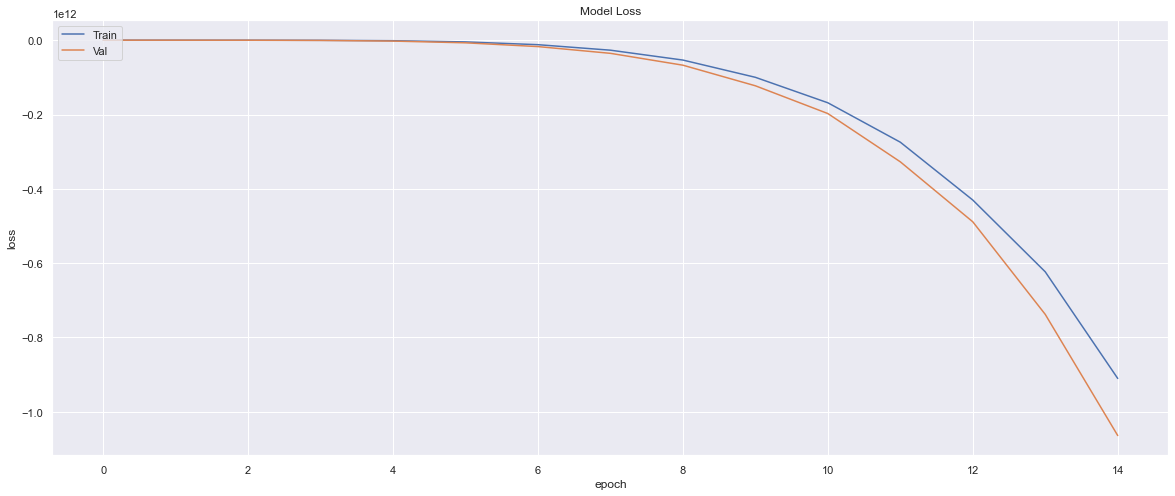

In [7]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
#plot the training loss over every epoch
plt.plot(history.history['val_loss'])
#plot the validation loss
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

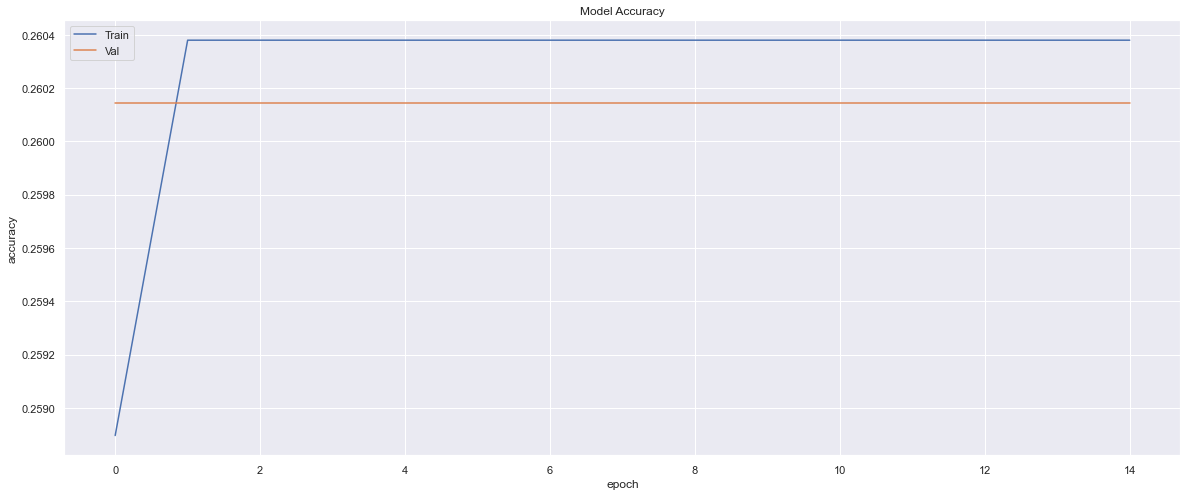

In [8]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
#plot the training accuracy over all the epochs
plt.plot(history.history['val_accuracy'])
#plot the validation accuracy over all the epochs
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [9]:
y_test=valdata.classes
#has all the labels in form of binary for all the samples in the validation dataset
y_pred=model.predict(valdata)
#predicts the probabilities of every sample in the validation dataset using the trained model
y_pred_probs=y_pred.copy()
#saves a copy of the predicted probabilities
y_pred[y_pred>0.5]=1
#makes all the predictions with probability greater that 0.5 equal to calss label 1 
y_pred[y_pred<0.5]=0
#makes all the predictions with probability smaller that 0.5 equal to class label 0 

14/14 [==============================] - 8s 473ms/step


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
print(classification_report(y_test, y_pred, target_names=['Normal','cataract','diabetic_retinopathy','glaucoma']))

                      precision    recall  f1-score   support

              Normal       0.00      0.00      0.00       103
            cataract       0.26      1.00      0.41       109
diabetic_retinopathy       0.00      0.00      0.00       100
            glaucoma       0.00      0.00      0.00       107

            accuracy                           0.26       419
           macro avg       0.07      0.25      0.10       419
        weighted avg       0.07      0.26      0.11       419



C:\Users\A S U S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A S U S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A S U S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Another aproach

In [17]:
img_width, img_height,img_size = 258, 258,258
batchsize = 64
epochs = 10
num_of_class = 4

train = keras.utils.image_dataset_from_directory(
    directory='G:/eye data/Splited_Dataset(0.8,0.1,0.1)/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))


validation = keras.utils.image_dataset_from_directory(
    directory='G:/eye data/Splited_Dataset(0.8,0.1,0.1)/validation',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras.utils.image_dataset_from_directory(
    directory='G:/eye data/Splited_Dataset(0.8,0.1,0.1)/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 3372 files belonging to 4 classes.
Found 419 files belonging to 4 classes.
Found 426 files belonging to 4 classes.


In [19]:
# Extracting Features and Labels
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())
    
for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [20]:
# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (3372, 258, 258, 3)
Shape of 'y_train': (3372, 4)
Shape of 'x_val': (419, 258, 258, 3)
Shape of 'y_val': (419, 4)
Shape of 'x_test': (426, 258, 258, 3)
Shape of 'y_test': (426, 4)


In [23]:
# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data
x_train=x_train/255
x_val=x_val/255
x_test=x_test/255

In [24]:
x_test[1,:]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

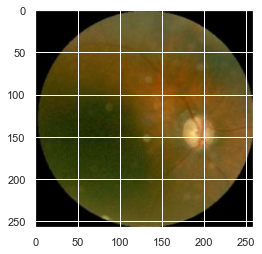

In [25]:
 ind = random.randint(0,len(x_test))
plt.imshow(x_test[ind, :])
plt.show()

In [26]:

os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
model=Sequential()
model.add(Conv2D(32,(2,2),input_shape=(img_size,img_size,3),activation="relu",padding='same',strides=1))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),strides=2,activation="relu",padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2), strides=1,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation='sigmoid'))



# model 5

In [27]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])


In [28]:
history = model.fit(
    x_train,y_train,
    epochs=15,
    validation_data=(x_val, y_val)
)


Epoch 1/15
106/106 [==============================] - 199s 2s/step - loss: 0.4076 - accuracy: 0.5827 - val_loss: 0.2923 - val_accuracy: 0.7613
Epoch 2/15
106/106 [==============================] - 159s 1s/step - loss: 0.2834 - accuracy: 0.7343 - val_loss: 0.2173 - val_accuracy: 0.8043
Epoch 3/15
106/106 [==============================] - 151s 1s/step - loss: 0.2468 - accuracy: 0.7782 - val_loss: 0.1823 - val_accuracy: 0.8878
Epoch 4/15
106/106 [==============================] - 151s 1s/step - loss: 0.2266 - accuracy: 0.8034 - val_loss: 0.2062 - val_accuracy: 0.8258
Epoch 5/15
106/106 [==============================] - 152s 1s/step - loss: 0.2056 - accuracy: 0.8197 - val_loss: 0.1860 - val_accuracy: 0.8473
Epoch 6/15
106/106 [==============================] - 170s 2s/step - loss: 0.1937 - accuracy: 0.8321 - val_loss: 0.2266 - val_accuracy: 0.8162
Epoch 7/15
106/106 [==============================] - 171s 2s/step - loss: 0.1860 - accuracy: 0.8378 - val_loss: 0.1463 - val_accuracy: 0.9021

In [29]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 7s 505ms/step - loss: 1.0815 - accuracy: 0.6197


[1.0814956426620483, 0.6197183132171631]

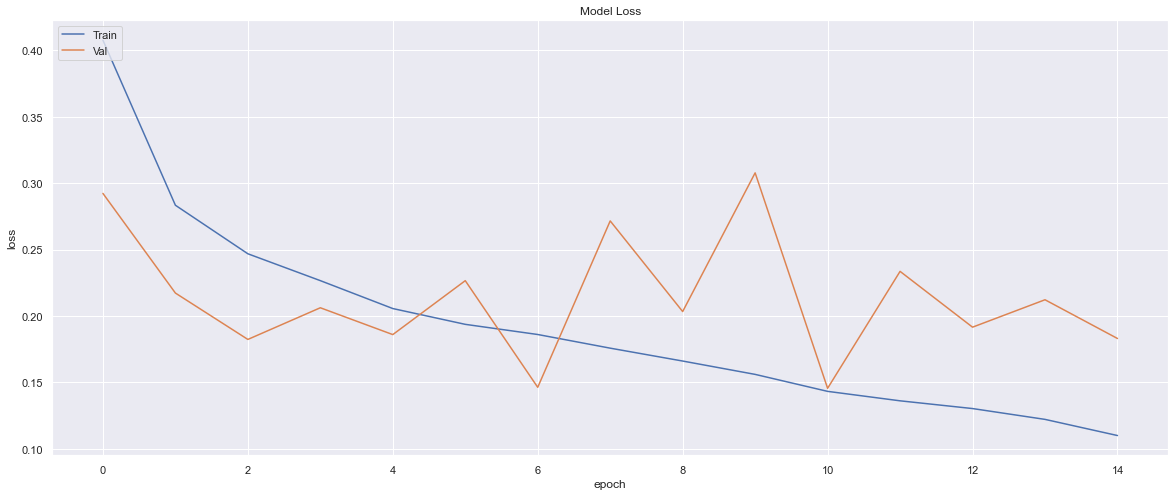

In [30]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
#plot the training loss over every epoch
plt.plot(history.history['val_loss'])
#plot the validation loss
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

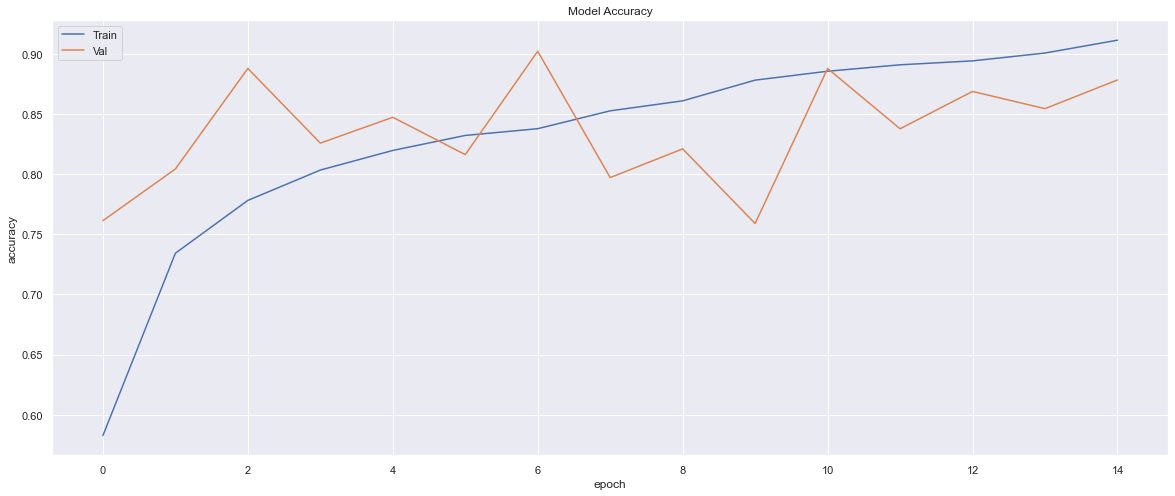

In [31]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
#plot the training accuracy over all the epochs
plt.plot(history.history['val_accuracy'])
#plot the validation accuracy over all the epochs
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [32]:
model.save('eye_disease_cnn_v02.h5')

C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
y_test=validation.classes
#has all the labels in form of binary for all the samples in the validation dataset
y_pred=model.predict(validation)
#predicts the probabilities of every sample in the validation dataset using the trained model
y_pred_probs=y_pred.copy()
#saves a copy of the predicted probabilities
y_pred[y_pred>0.5]=1
#makes all the predictions with probability greater that 0.5 equal to calss label 1 
y_pred[y_pred<0.5]=0
#makes all the predictions with probability smaller that 0.5 equal to class label 0 

AttributeError: '_PrefetchDataset' object has no attribute 'classes'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 21s 1s/step - loss: 1.5924 - accuracy: 0.6502


[1.5924091339111328, 0.6502347588539124]

In [21]:
import pickle


In [23]:
Pneumonia_pretrained_model_file = 'eye-disease-pretrained-CNN-02-model.sav'

In [24]:
pickle.dump(model,open(Pneumonia_pretrained_model_file,'wb'))

14/14 [==============================] - 14s 851ms/step


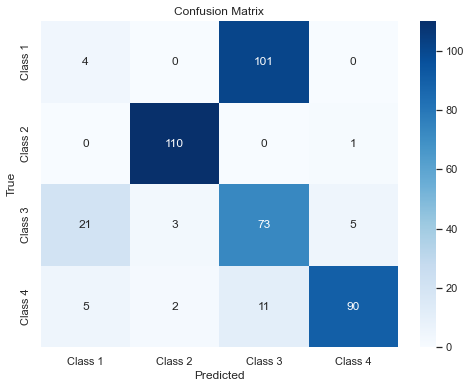

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {i+1}' for i in range(num_of_class)],
            yticklabels=[f'Class {i+1}' for i in range(num_of_class)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
